In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Load your data (replace 'your_data.csv' with your actual file)

data = pd.read_csv('new_dataset.csv')
numeric_data = data.select_dtypes(exclude='object')
#column_to_drop = "TYPE OF SECURITY (ACQUIRED/DISPLOSED)"
#numeric_data = numeric_data.drop(column_to_drop, axis=1)
#numeric_data=numeric_data.drop("TYPE OF SECURITY (ACQUIRED/DISPLOSED) \r\n",axis=1)



In [2]:
print(data)

     SYMBOL \n NAME OF THE ACQUIRER/DISPOSER \n  \
0       360ONE                    Vishal Khanna   
1       360ONE                     Meer Thakker   
2       360ONE                  Anup Maheshwari   
3       360ONE               ARZAN FALI TAMBOLY   
4       360ONE                      Chetan Naik   
...        ...                              ...   
2081    5PAISA              MAYUR PREMJI DEDHIA   
2082    5PAISA                 PRAKARSH GAGDANI   
2083    5PAISA                 PRAKARSH GAGDANI   
2084    5PAISA              MAYUR PREMJI DEDHIA   
2085    5PAISA                 PRAKARSH GAGDANI   

               CATEGORY OF PERSON \n TYPE OF SECURITY (PRIOR) \n  \
0                                  -               Equity Shares   
1                                  -               Equity Shares   
2                                  -               Equity Shares   
3                                  -               Equity Shares   
4                                  -           

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   SYMBOL 
                                     2086 non-null   object 
 1   NAME OF THE ACQUIRER/DISPOSER 
              2086 non-null   object 
 2   CATEGORY OF PERSON 
                         2086 non-null   object 
 3   TYPE OF SECURITY (PRIOR) 
                   2086 non-null   object 
 4   % SHAREHOLDING (PRIOR) 
                     2086 non-null   float64
 5   NO. OF SECURITIES (ACQUIRED/DISPLOSED) 
     2086 non-null   float64
 6   VALUE OF SECURITY (ACQUIRED/DISPLOSED) 
     2086 non-null   int64  
 7   ACQUISITION/DISPOSAL TRANSACTION TYPE 
      2086 non-null   object 
 8   NO. OF SECURITY (POST) 
                     2086 non-null   object 
 9   DATE OF ALLOTMENT/ACQUISITION FROM 
         2086 non-null   object 
 10  

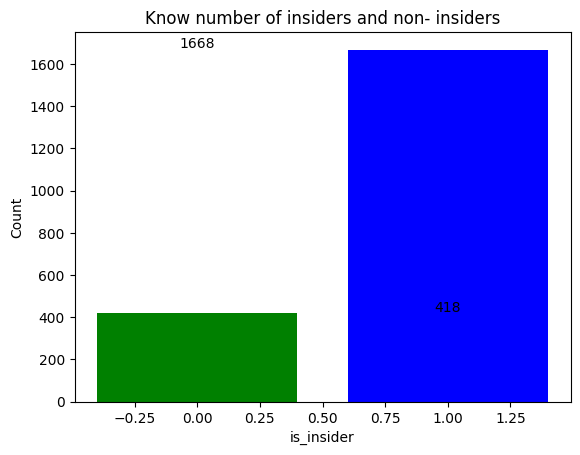

In [4]:
# Count the occurrences of each value in the binary column
value_counts = data['is_insider'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('is_insider')
plt.ylabel('Count')
plt.title('Know number of insiders and non- insiders')

# Add value labels on top of each bar
for i, v in enumerate(value_counts.values):
    plt.text(i, v + 10, str(v), ha='center')

# Show the plot
plt.show()

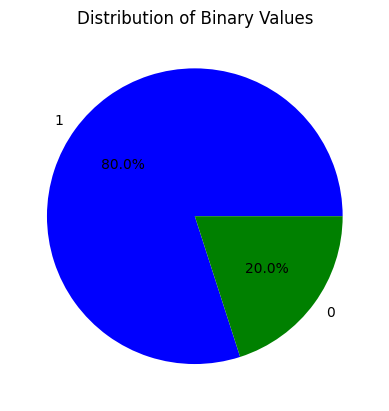

In [5]:
# Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=['blue', 'green'])

# Add title
plt.title('Distribution of Binary Values')

# Show the plot
plt.show()


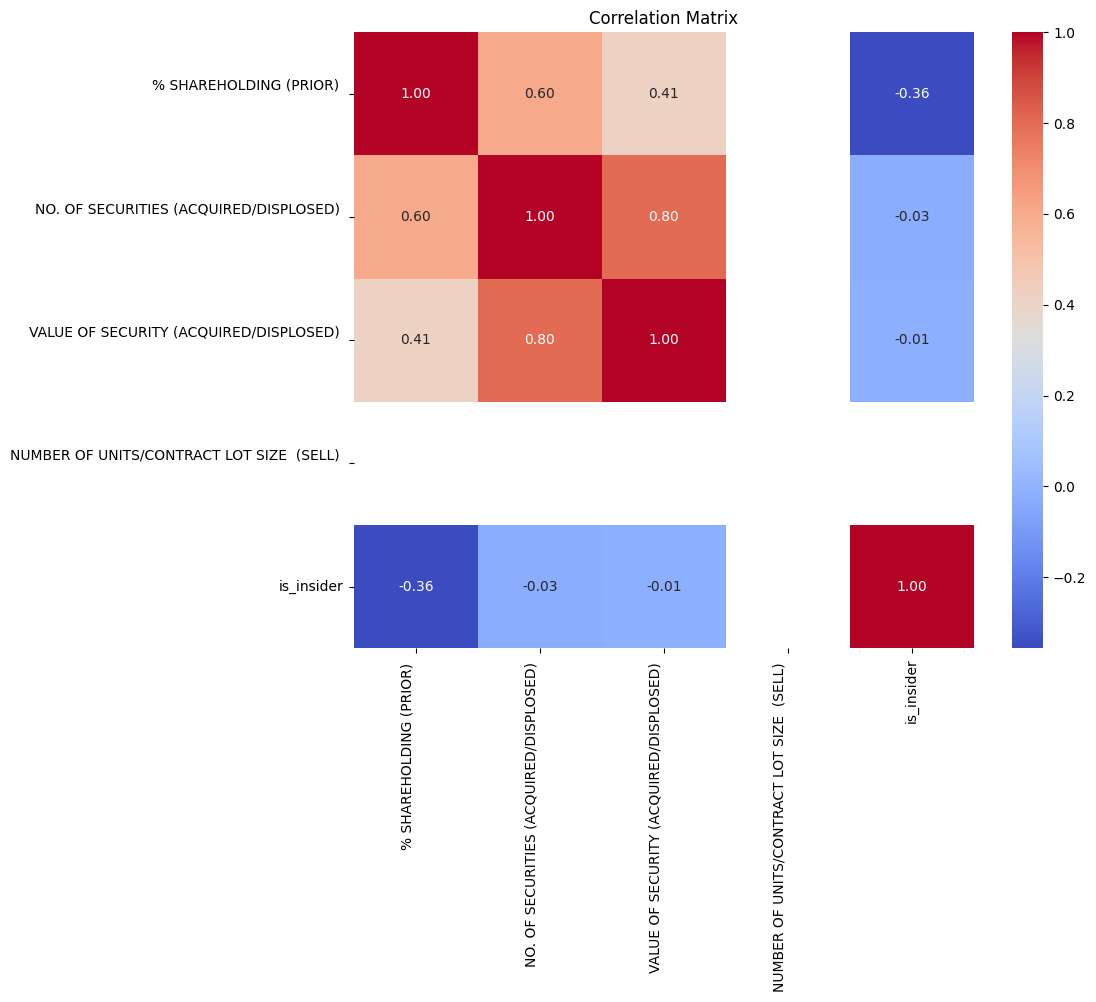

In [6]:
import seaborn as sns
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
values=numeric_data.drop("is_insider",axis=1)
labels=numeric_data["is_insider"]
values=values.fillna(values.mean())

In [8]:
scaler = StandardScaler()
values= scaler.fit_transform(values)
values


array([[-0.25171614, -0.07134029, -0.10839527,  0.        ],
       [-0.24821385, -0.06937363, -0.10036666,  0.        ],
       [-0.24120929, -0.04854052, -0.02183955,  0.        ],
       ...,
       [-0.22720015, -0.06175446, -0.08906762,  0.        ],
       [-0.2166933 , -0.07017716, -0.10826985,  0.        ],
       [-0.24120929, -0.05956694, -0.08541594,  0.        ]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(values, labels, test_size=0.2, random_state=42)

# Define and train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel for initial exploration
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model (using metrics from previous example)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_result)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Grid search for hyperparameter tuning (optional, but recommended for best performance)
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)
print(accuracy)

Confusion Matrix:
 [[ 31  67]
 [  6 314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.32      0.46        98
           1       0.82      0.98      0.90       320

    accuracy                           0.83       418
   macro avg       0.83      0.65      0.68       418
weighted avg       0.83      0.83      0.79       418

Best Parameters: {'C': 10, 'kernel': 'rbf'}
0.8253588516746412


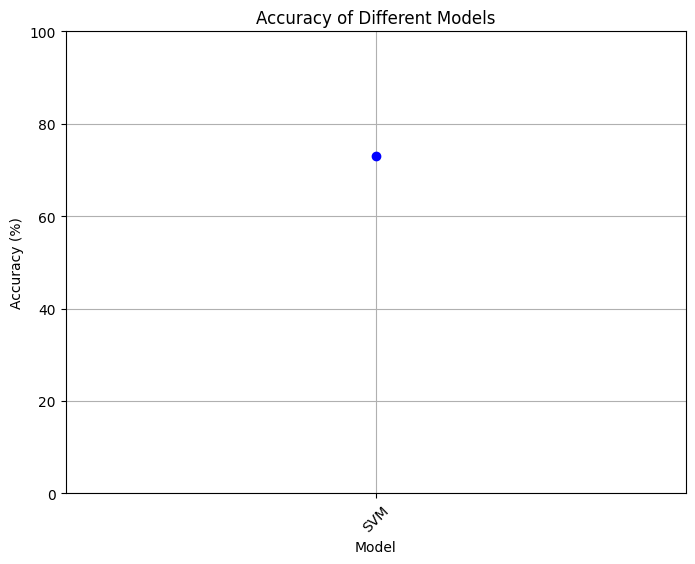

In [10]:


# Define model names and their corresponding accuracies
models = ['SVM']  # Replace with names of your models
accuracies = [73]  # Replace with corresponding accuracy values

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot(models, accuracies, marker='o', color='blue', linestyle='-')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.grid(True)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


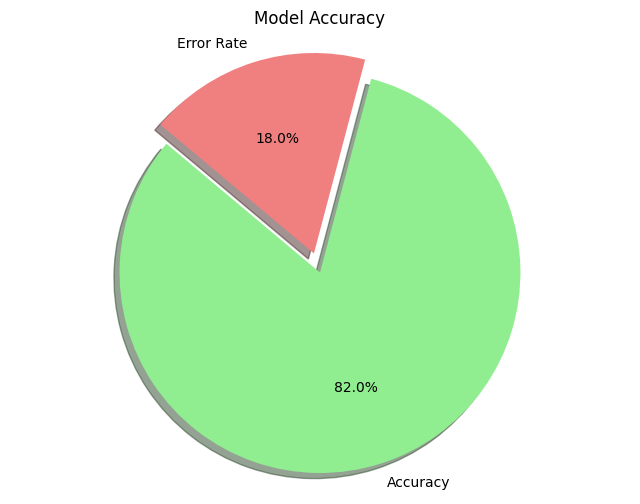

<Figure size 640x480 with 0 Axes>

In [12]:


# Define accuracy and error rate
accuracy = 82
error_rate = 100 - accuracy

# Define labels and sizes for the pie chart
labels = ['Accuracy', 'Error Rate']
sizes = [accuracy, error_rate]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the "Accuracy" slice

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
plt.savefig('svm_accuracy.png')
